## FFT Algorithm and image compression

In [1]:
import numpy as np

def brute_force_dft(x):
    """
    computes the Discrete Fourier Transform (DFT) of a 1D array.
    """
    n = len(x)
    n_range = np.arange(n)
    k_range = n_range.reshape((n,1))
    exponents = np.exp(-2j*np.pi*k_range*n_range/n)
    return np.dot(exponents,x)


# Signal creation
fs = 100  # Sample frequency
t = np.arange(0, 1, 1/fs)
f1 = 5  # Frequency of sine wave 1
f2 = 15 # Frequency of sine wave 2
signal = 0.5*np.sin(2*np.pi*f1*t) + 0.8*np.sin(2*np.pi*f2*t)

# Compute the DFT
dft_result = brute_force_dft(signal)
print("Brute-force DFT Result:", dft_result)


Brute-force DFT Result: [ 6.32827124e-15+0.00000000e+00j  1.60511446e-14-2.37618119e-14j
  4.13474191e-15+3.09270394e-14j  6.63758477e-16+2.31921835e-15j
  1.55879139e-14+1.05666799e-14j  2.45497200e-15-2.50000000e+01j
  4.50116656e-15+2.37162246e-14j -3.51763311e-14+2.94699277e-14j
 -8.94869076e-15-1.47493997e-14j -1.47500610e-14+1.79462152e-14j
 -9.94282219e-15+2.00923823e-14j  1.25559274e-15+1.28429458e-14j
 -7.64262438e-15+4.52138661e-14j -1.51259729e-14+4.60642146e-14j
 -1.56814255e-14+1.17768715e-15j -3.63366222e-15-4.00000000e+01j
  3.12427916e-14-3.54858792e-14j  1.32610533e-14-3.54413183e-14j
 -1.74857673e-15-3.92442851e-14j  5.25006748e-14-2.07368363e-15j
  6.46322388e-15-4.41099973e-15j -2.32531237e-14+8.01025770e-15j
 -5.27298235e-15+6.31836781e-14j -1.42254293e-14-8.73990885e-16j
 -2.62095503e-14-6.67984432e-14j  2.32978061e-14-1.62802831e-15j
  4.04171946e-15+1.46239613e-14j -5.72175123e-16-2.20313971e-14j
  5.23885506e-14-3.39071412e-15j -1.91807104e-14-7.79597288e-15j
 

In [2]:
import numpy as np

def cooley_tukey_fft_power_of_2(x):
    """
    computes the Discrete Fourier Transform (DFT) of a 1D array using the
    Cooley-Tukey algorithm (recursive implementation).

    input size must be a power of 2.
    """
    n = len(x)
    if n <= 1:
        return x
    else:
        even = cooley_tukey_fft_power_of_2(x[::2])
        odd = cooley_tukey_fft_power_of_2(x[1::2])
        terms = np.exp(-2j*np.pi*np.arange(n//2)/n)*odd
        return np.concatenate([even+terms,even-terms])

def next_power_of_2(n):
    return 2**(int(np.ceil(np.log2(n))))

def cooley_tukey_fft_any_size(x):
    """
    Computes the DFT of a 1D array of any size using the Cooley-Tukey algorithm
    by padding the input.
    """
    n = len(x)
    padded_n = next_power_of_2(n)
    padded_x = np.pad(x, (0, padded_n - n), mode='constant')
    fft_result_padded = cooley_tukey_fft_power_of_2(padded_x)
    return fft_result_padded

def cooley_tukey_fft_any_size_nd(x):
    """
    Computes the DFT of a 1D or 2D array of any size using the Cooley-Tukey algorithm
    by padding the input for each dimension.
    """
    if x.ndim == 1:
        return cooley_tukey_fft_any_size(x)
    elif x.ndim == 2:
        rows, cols = x.shape
        padded_rows = next_power_of_2(rows)
        padded_cols = next_power_of_2(cols)
        padded_x = np.pad(x, ((0, padded_rows-rows), (0, padded_cols-cols)), mode='constant')

        fft_rows = np.apply_along_axis(cooley_tukey_fft_power_of_2, axis=1, arr=padded_x)
        fft_2d = np.apply_along_axis(cooley_tukey_fft_power_of_2, axis=0, arr=fft_rows)

        return fft_2d
    else:
        raise ValueError("Input array must be 1D or 2D")


# Example:
# Generate signal of arbitrary size
n_points_1d = 150
fs_1d = 100
t_1d = np.arange(0, n_points_1d/fs_1d, 1/fs_1d)
f1_1d = 5
f2_1d = 15
signal_1d = 0.5 * np.sin(2 * np.pi * f1_1d * t_1d) + 0.8 * np.sin(2 * np.pi * f2_1d * t_1d)

# Compute the FFT
fft_result_1d = cooley_tukey_fft_any_size_nd(signal_1d)
print("FFT Result (1D, Any Size):", fft_result_1d)


# Generate a 2D signal of arbitrary size
signal_2d = np.random.rand(100, 120)
fft_result_2d = cooley_tukey_fft_any_size_nd(signal_2d)
print("FFT Result (2D, Any Size):\n", fft_result_2d)

FFT Result (1D, Any Size): [ 4.72696416e+00+0.00000000e+00j  3.37728007e-01+1.22039220e+00j
  3.53960638e+00-2.12155842e+00j  2.58194531e+00+2.45821629e+00j
  1.13107384e+00-2.11609032e+00j  5.07344689e+00+1.13928060e+00j
  1.36408023e-02+2.77664909e-01j  5.53877262e+00-1.82976332e+00j
  2.11249638e+00+3.16157425e+00j  3.38647421e+00-3.92586473e+00j
  8.03797825e+00+3.80168058e+00j  4.05353311e-01-2.33610870e+00j
  2.77439952e+01-2.73254502e+00j -1.28626525e+01-3.33451727e+01j
 -9.29858515e+00+6.89630076e+00j -4.15072944e+00-3.23926104e+00j
 -5.50577692e-01+1.32921213e+00j -2.17741277e+00-2.68558250e-01j
 -2.66086542e-02-1.79380976e-01j -4.61940992e-01+2.04764359e-01j
 -1.38782585e-02-1.69107069e-02j  1.27449876e-01-1.80964919e-01j
  6.57827590e-01+2.35374475e-01j  5.75176373e-03-7.79747585e-02j
  1.31202038e+00-2.60977080e-01j  3.35329869e-01+6.66186033e-01j
  1.07570117e+00-9.74958706e-01j  1.62557093e+00+1.02938144e+00j
  2.21313909e-01-7.29574184e-01j  3.02120919e+00+7.41665226e-02

No Image found, please upload one


Saving maxresdefault.jpg to maxresdefault.jpg


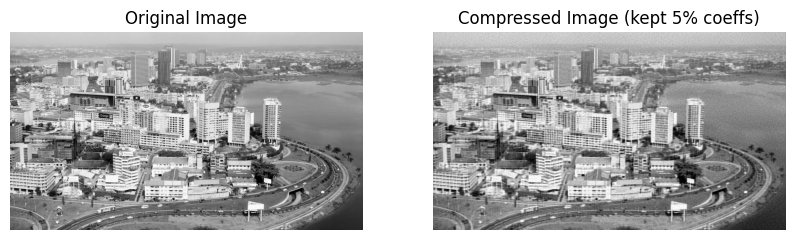

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def compress_image_fft(image_path, keep_fraction=0.1):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    fft_img = cooley_tukey_fft_any_size_nd(img_array)

    fft_flat = fft_img.flatten()
    sorted_coeffs = np.sort(np.abs(fft_flat))
    threshold = sorted_coeffs[int(np.floor((1 - keep_fraction) * len(sorted_coeffs)))]

    fft_img_compressed = fft_img * (np.abs(fft_img) > threshold)

    # Perform inverse 2D FFT
    # Note: Our cooley_tukey_fft_any_size_nd pads the input,
    # so we need an inverse that handles the padded size.
    # For simplicity and correctness with padding, we'll use NumPy's ifft2 here.
    # A custom inverse Cooley-Tukey would be more complex.
    compressed_img_array = np.fft.ifft2(fft_img_compressed)

    compressed_img_array = np.real(compressed_img_array)
    compressed_img_array = np.uint8(np.clip(compressed_img_array, 0, 255))

    original_rows, original_cols = img_array.shape
    compressed_img_array = compressed_img_array[:original_rows, :original_cols]

    return compressed_img_array

try:
  img = Image.open('/content/sample_data/fluid.png').convert('L')
except:
  print("No Image found, please upload one")
  from google.colab import files
  uploaded = files.upload()
  img = Image.open(list(uploaded.keys())[0]).convert('L')
img.save('/content/test_image.png')
image_path = '/content/test_image.png'


compressed_image_data = compress_image_fft(image_path, keep_fraction=0.05)

original_img = Image.open(image_path).convert('L')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image_data, cmap='gray')
plt.title(f'Compressed Image (kept {5}% coeffs)')
plt.axis('off')

plt.show()

Audio file 'your_audio.wav' not found. Please upload a WAV file.


Saving KSHMR_Big_Kick_01_F.wav to KSHMR_Big_Kick_01_F.wav


/tmp/ipython-input-124916003.py:27: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, samplerate / 2)


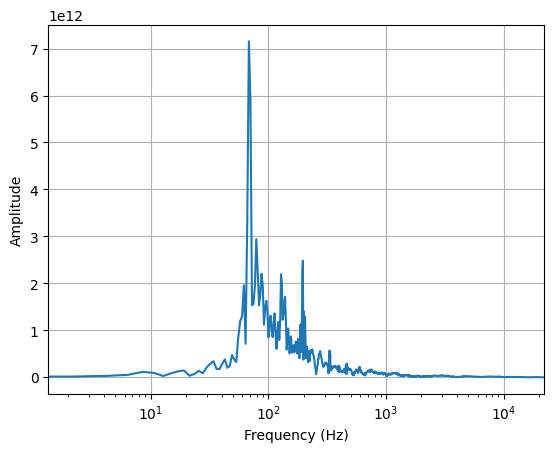

In [4]:
from scipy.io import wavfile
from google.colab import files # Import files for uploading

def analyze_audio_spectrum(audio_path):
  try:
    samplerate, data = wavfile.read(audio_path)
  except FileNotFoundError:
    print(f"Audio file '{audio_path}' not found. Please upload a WAV file.")
    uploaded = files.upload()
    uploaded_filename = list(uploaded.keys())[0]
    analyze_audio_spectrum(uploaded_filename)
    return None

  if data.ndim > 1:
    data = data[:, 0]
  fft_result = cooley_tukey_fft_any_size_nd(data.astype(float))

  n = len(data)
  freqs = np.fft.fftfreq(n, 1/samplerate)

  fig, ax = plt.subplots()
  ax.plot(freqs[:n//2], np.abs(fft_result[:n//2]))
  ax.set_xlabel('Frequency (Hz)')
  ax.set_ylabel('Amplitude')
  ax.set_xscale('log')
  ax.grid(True)
  ax.set_xlim(0, samplerate / 2)
  plt.show()


audio_file_path = 'your_audio.wav'
analyze_audio_spectrum(audio_file_path)


In [ ]:
from scipy.signal import windows

def plot_spectrogram(audio_file_path, window_size_ms=20, overlap_fraction=0.5):
    """
    Generates and plots a spectrogram of an audio file.

    Args:
        audio_file_path (str): Path to the audio file.
        window_size_ms (int, optional): Window size in milliseconds. Defaults to 20.
        overlap_fraction (float, optional): Fraction of overlap between windows. Defaults to 0.5.
    """


    try:
        samplerate, data = wavfile.read(audio_file_path)
    except FileNotFoundError:
        print(f"Audio file '{audio_file_path}' not found. Please upload a WAV file.")
        uploaded = files.upload()
        uploaded_filename = list(uploaded.keys())[0]
        samplerate, data = wavfile.read(uploaded_filename)

    if data.ndim > 1:
        data = data[:, 0]

    window_length = int(samplerate * window_size_ms / 1000)
    hop_length = int(window_length * (1 - overlap_fraction))

    if window_length == 0:
        window_length = 1

    hann_window = windows.hann(window_length, sym=False)

    stft_results = []
    num_samples = len(data)

    for i in range(0, num_samples - window_length + 1, hop_length):
        segment = data[i : i + window_length]
        windowed_segment = segment * hann_window
        fft_segment = cooley_tukey_fft_any_size_nd(windowed_segment)
        stft_results.append(fft_segment)

    spectrogram = np.array(stft_results).T

    num_windows = spectrogram.shape[1]
    time_axis = np.arange(num_windows) * hop_length / samplerate
    fft_length = spectrogram.shape[0]


    if fft_length > 2:
        freq_axis = np.fft.fftfreq(fft_length, d=1/samplerate)[1:fft_length//2]
        spectrogram_data_to_plot = spectrogram[1:fft_length//2, :]
    else:
        freq_axis = np.array([1.0])
        spectrogram_data_to_plot = np.array([[1e-9]])
        print("Warning: Insufficient frequency resolution for a meaningful log-scale spectrogram. Plotting with placeholder frequency data.")

    fig, ax = plt.subplots()

    # Only plot if there's actual frequency data to avoid errors with empty arrays
    if len(freq_axis) > 0 and spectrogram_data_to_plot.shape[0] > 0:
        mesh = ax.pcolormesh(time_axis, freq_axis, 20 * np.log10(np.abs(spectrogram_data_to_plot) + 1e-9),
                       shading='auto', cmap='viridis')
        fig.colorbar(mesh, ax=ax, label='Magnitude (dB)')
        ax.set_yscale('log')
        ax.set_ylim(freq_axis.min(), freq_axis.max())
    else:
        ax.text(0.5, 0.5, "No sufficient frequency data to plot spectrogram on log scale",
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        print("Error: Spectrogram could not be plotted due to insufficient frequency data.")

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title('Spectrogram')
    plt.tight_layout()
    plt.show()

audio_file_path = ''
plot_spectrogram(audio_file_path, 100, 0.5)

Audio file '' not found. Please upload a WAV file.


Saving Bounce_toSC.wav to Bounce_toSC (1).wav
